In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import sys, os
sys.path.append('..')

In [4]:
int(48*np.sqrt(2))

67

In [13]:
img_size = 5
ax = np.array(range(0, img_size))
X, Y = np.meshgrid(ax, ax)

In [14]:
img1 = np.array([[0,0,0,0,0],
                 [0,1,1,1,0],
                 [0,1,0,1,0],
                 [0,1,1,1,0],
                 [0,0,0,0,0]])

img2 = np.array([[0,0,1,0,0],
                 [0,1,1,1,0],
                 [1,1,1,1,1],
                 [0,1,1,1,0],
                 [0,0,1,0,0]])

imgs = np.stack([img1, img2])[:, np.newaxis]
imgs

array([[[[0, 0, 0, 0, 0],
         [0, 1, 1, 1, 0],
         [0, 1, 0, 1, 0],
         [0, 1, 1, 1, 0],
         [0, 0, 0, 0, 0]]],


       [[[0, 0, 1, 0, 0],
         [0, 1, 1, 1, 0],
         [1, 1, 1, 1, 1],
         [0, 1, 1, 1, 0],
         [0, 0, 1, 0, 0]]]])

In [15]:
N = 2

In [16]:
Xs = np.tile(X, (N, 1)).reshape(N, 1, 5, 5)
Ys = np.tile(Y, (N, 1)).reshape(N, 1, 5, 5)

In [17]:
data = np.concatenate([Xs, Ys, imgs], 1)
data.shape

(2, 3, 5, 5)

In [26]:
result = []
for j in range(1000):   
    cnt = 0
    for i in range(784):
        a = np.random.randint(0, 100)
        if a < 25:
            cnt += 1
    result.append(cnt/784)

(array([  2.,   3.,  22.,  45.,  62., 142., 148., 159., 152., 132.,  74.,
         40.,  14.,   4.,   1.]),
 array([0.2       , 0.20666667, 0.21333333, 0.22      , 0.22666667,
        0.23333333, 0.24      , 0.24666667, 0.25333333, 0.26      ,
        0.26666667, 0.27333333, 0.28      , 0.28666667, 0.29333333,
        0.3       ]),
 <BarContainer object of 15 artists>)

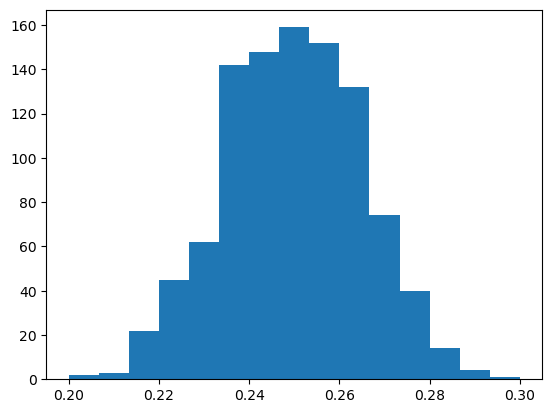

In [47]:
plt.hist(result, bins=15, range=(0.2, 0.3))

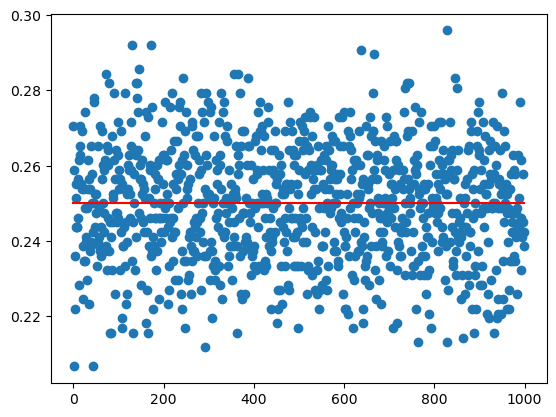

In [34]:
plt.scatter(range(1000), result)
plt.plot([0, 999], [0.25, 0.25], "r")

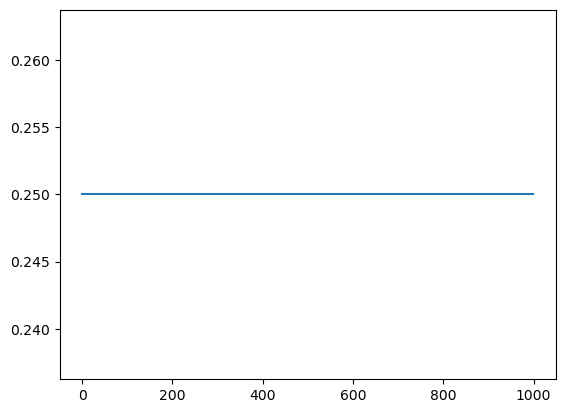

In [33]:
plt.plot([0, 999], [0.25, 0.25])

In [110]:
points = torch.tensor([
                        [[ 0,  0],
                        [47,  0],
                        [47, 47],
                        [ 0, 47],
                        [ 0,  0]],

                        [[23,  0],
                         [47, 23],
                         [23, 47],
                         [ 0, 23],
                         [23,  0]],
                        
                        [[10, 10],
                         [30, 10],
                         [30, 30],
                         [10, 30],
                         [10, 10]],

                        [[ 0,  0],
                         [ 3,  0],
                         [ 3,  3],
                         [ 0,  3],
                         [ 0,  0]]
                      ])

In [53]:
47*4

188

In [89]:
23.5*np.sqrt(2)*4

132.93607486307096

In [111]:
distance1 = (torch.abs(torch.diff(points, dim=-2))).sum(dim=[-1, -2])
distance1

tensor([188, 188,  80,  12])

In [112]:
torch.diff(points, dim=-2)

tensor([[[ 47,   0],
         [  0,  47],
         [-47,   0],
         [  0, -47]],

        [[ 24,  23],
         [-24,  24],
         [-23, -24],
         [ 23, -23]],

        [[ 20,   0],
         [  0,  20],
         [-20,   0],
         [  0, -20]],

        [[  3,   0],
         [  0,   3],
         [ -3,   0],
         [  0,  -3]]])

In [113]:
distance2 = (torch.sqrt(((torch.diff(points, dim=-2))**2).sum(dim=-1))).sum(dim=1)
distance2

tensor([188.0000, 132.9511,  80.0000,  12.0000])

In [129]:
list(range(4))

[0, 1, 2, 3]

In [72]:
x2y2 = ((torch.diff(points, dim=-2))**2).sum(dim=-1)
x2y2

tensor([[2209, 2209, 2209, 2209],
        [1105, 1152, 1105, 1058]])

In [73]:
step_distances = 1. + (x2y2 - 1.)/2 - (x2y2 - 1.)**2/8 + (x2y2 - 1.)**3/16
distances3 = step_distances.sum(dim=-1)
step_distances

tensor([[6.7218e+08, 6.7218e+08, 6.7218e+08, 6.7218e+08],
        [8.3947e+07, 9.5138e+07, 8.3947e+07, 7.3669e+07]])

In [70]:
distances3

tensor([-2433212.0000,  -607748.2500])

In [75]:
d = np.array([range(0,48)])

In [131]:
a = (d**2 + (d**2).T).mean().astype(np.float32)
a.dtype

dtype('float32')

In [132]:
b = (d**2 + (d**2).T).mean()
b.dtype

dtype('float64')

In [135]:
c = float(b)
c

1488.3333333333333

In [94]:
ds = (d**2 + (d**2).T)**(0.5)

In [95]:
ds.mean()

36.08155975169256

In [96]:
ds.std()

13.654829886101579

In [81]:
1488.3**(-0.5)/2

0.012960589738913661

In [82]:
1488.3**(-1.5)/4/2

2.1770795099969192e-06

In [83]:
1488.3**(0.5)

38.5784914168504

In [84]:
np.sqrt(1488.3)

38.5784914168504

In [114]:
x = ((torch.diff(points, dim=-2))**2).sum(dim=-1)
x0 = 1488.3
c0 = x0**(0.5)
c1 = x0**(-0.5)/2
c2 = -(x0**(-1.5)/4/2)

step_distances = c0 + c1*(x - x0) + c2*(x - x0)**2
distances3 = step_distances.sum(dim=-1)

In [115]:
distances3

tensor([187.1536, 133.1537,  87.5798,  58.5669])

In [116]:
step_distances2 = c0 + c1*(x - x0)
distances4 = step_distances2.sum(dim=-1)
distances4

tensor([191.6768, 134.4428,  97.8939,  77.6236])

In [121]:
x = np.array(range(0, 47*47*2))

x0 = 1488.3
c0 = x0**(0.5)
c1 = x0**(-0.5)/2
c2 = -(x0**(-1.5)/8)
c3 = (x0**(-2.5)/16)

sqrt_x = np.sqrt(x)
sqrt_x_1 = c0 + c1*(x - x0)
sqrt_x_2 = c0 + c1*(x - x0) + c2*(x - x0)**2
sqrt_x_3 = c0 + c1*(x - x0) + c2*(x - x0)**2 + c3*(x - x0)**3

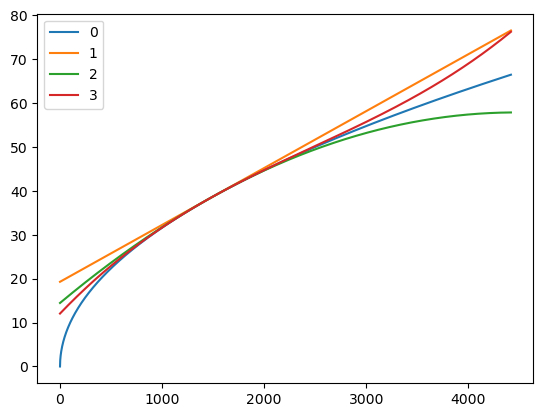

In [122]:
plt.plot(x, sqrt_x, label='0')
plt.plot(x, sqrt_x_1, label='1')
plt.plot(x, sqrt_x_2, label='2')
plt.plot(x, sqrt_x_3, label='3')
plt.legend()
plt.show()

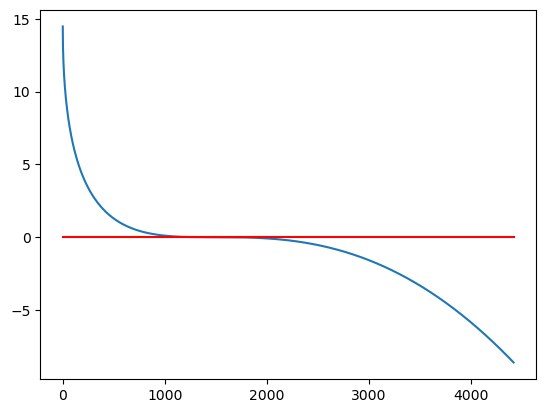

In [120]:
plt.plot(x, sqrt_x_2 - sqrt_x)
plt.plot([0, 47*47*2], [0, 0], "r")
plt.show()

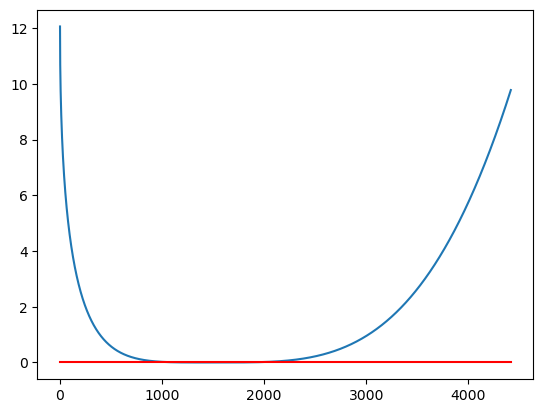

In [123]:
plt.plot(x, sqrt_x_3 - sqrt_x)
plt.plot([0, 47*47*2], [0, 0], "r")
plt.show()

In [125]:
np.sqrt(47*47*2)

66.46803743153546

In [147]:
x = torch.tensor([[[[1,3],
                    [5,7]],
                   [[2,4],
                    [6,8]],
                   [[10,20],
                    [30,40]]]])

In [148]:
x.size()

torch.Size([1, 3, 2, 2])

In [149]:
x.permute(0,2,3,1)

tensor([[[[ 1,  2, 10],
          [ 3,  4, 20]],

         [[ 5,  6, 30],
          [ 7,  8, 40]]]])

In [150]:
xf = x.view(x.size(0), -1)
xf

tensor([[ 1,  3,  5,  7,  2,  4,  6,  8, 10, 20, 30, 40]])

In [151]:
flatten = nn.Flatten()

In [152]:
xf2 = flatten(x.permute(0,2,3,1))
xf2

tensor([[ 1,  2, 10,  3,  4, 20,  5,  6, 30,  7,  8, 40]])

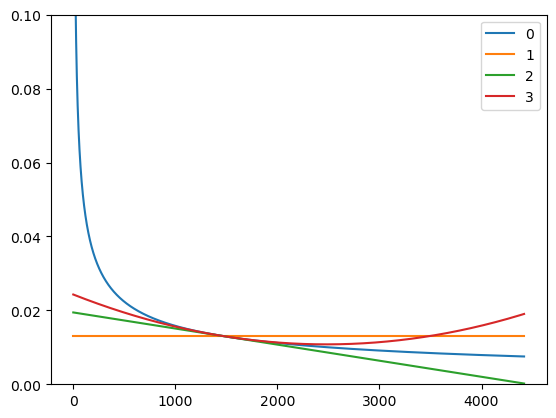

In [156]:
x = np.array(range(1, 47*47*2))

d_sqrt_x = 1/np.sqrt(x)/2
d_sqrt_x_1 = c1
d_sqrt_x_2 = c1 + 2*c2*(x - x0)
d_sqrt_x_3 = c1 + 2*c2*(x - x0) + 3*c3*(x - x0)**2

plt.plot(x, d_sqrt_x, label='0')
plt.plot([1, 47*47*2], [d_sqrt_x_1, d_sqrt_x_1], label='1')
plt.plot(x, d_sqrt_x_2, label='2')
plt.plot(x, d_sqrt_x_3, label='3')
plt.ylim(0, 0.1)
plt.legend()
plt.show()

In [157]:
s = np.array([range(-47,48)])
ds = (s**2 + (s**2).T).mean()

In [158]:
ds

1504.0

In [159]:
x = np.array(range(0, 47*47*2))

x0 = 1504
c0 = x0**(0.5)
c1 = x0**(-0.5)/2
c2 = -(x0**(-1.5)/8)
c3 = (x0**(-2.5)/16)

sqrt_x = np.sqrt(x)
sqrt_x_1 = c0 + c1*(x - x0)
sqrt_x_2 = c0 + c1*(x - x0) + c2*(x - x0)**2
sqrt_x_3 = c0 + c1*(x - x0) + c2*(x - x0)**2 + c3*(x - x0)**3

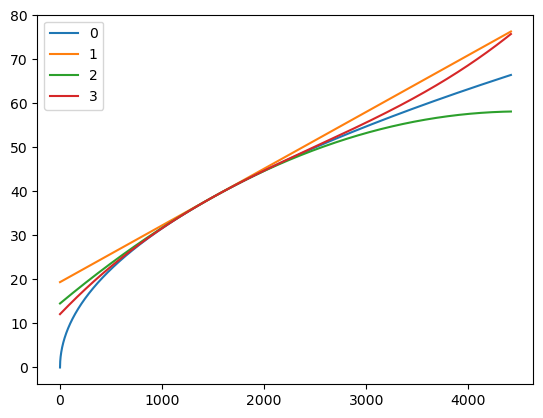

In [160]:
plt.plot(x, sqrt_x, label='0')
plt.plot(x, sqrt_x_1, label='1')
plt.plot(x, sqrt_x_2, label='2')
plt.plot(x, sqrt_x_3, label='3')
plt.legend()
plt.show()

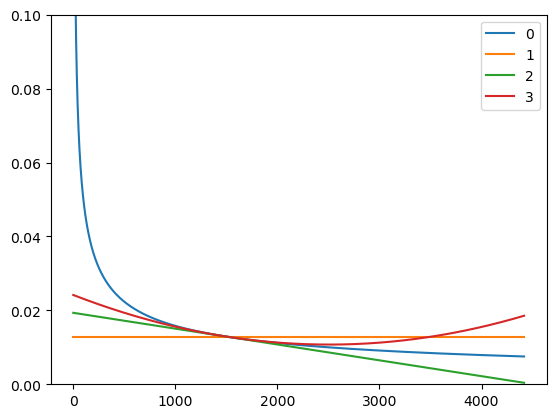

In [161]:
x = np.array(range(1, 47*47*2))

d_sqrt_x = 1/np.sqrt(x)/2
d_sqrt_x_1 = c1
d_sqrt_x_2 = c1 + 2*c2*(x - x0)
d_sqrt_x_3 = c1 + 2*c2*(x - x0) + 3*c3*(x - x0)**2

plt.plot(x, d_sqrt_x, label='0')
plt.plot([1, 47*47*2], [d_sqrt_x_1, d_sqrt_x_1], label='1')
plt.plot(x, d_sqrt_x_2, label='2')
plt.plot(x, d_sqrt_x_3, label='3')
plt.ylim(0, 0.1)
plt.legend()
plt.show()

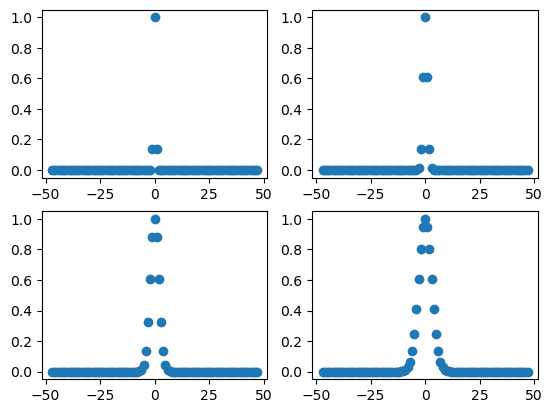

In [170]:
x = np.array(range(-47, 48))
w1 = 0.25
w2 = 1
w3 = 4
w4 = 9
y1 = np.exp(-x**2/(2*w1))
y2 = np.exp(-x**2/(2*w2))
y3 = np.exp(-x**2/(2*w3))
y4 = np.exp(-x**2/(2*w4))


fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.scatter(x, y1)
ax2.scatter(x, y2)
ax3.scatter(x, y3)
ax4.scatter(x, y4)
plt.show()

In [175]:
x = torch.randint(low=0, high=4, size=(1,3,4,4))
x

tensor([[[[3, 0, 3, 0],
          [0, 1, 0, 2],
          [0, 3, 0, 0],
          [1, 1, 1, 2]],

         [[1, 2, 1, 2],
          [1, 3, 1, 0],
          [0, 2, 2, 0],
          [1, 3, 2, 3]],

         [[0, 0, 2, 1],
          [1, 2, 0, 1],
          [3, 1, 2, 2],
          [0, 0, 2, 0]]]])

In [176]:
# x = self.flatten(x.permute(0,2,3,1))
x.permute(0,2,3,1)

tensor([[[[3, 1, 0],
          [0, 2, 0],
          [3, 1, 2],
          [0, 2, 1]],

         [[0, 1, 1],
          [1, 3, 2],
          [0, 1, 0],
          [2, 0, 1]],

         [[0, 0, 3],
          [3, 2, 1],
          [0, 2, 2],
          [0, 0, 2]],

         [[1, 1, 0],
          [1, 3, 0],
          [1, 2, 2],
          [2, 3, 0]]]])

In [185]:
x = torch.randint(low=0, high=4, size=(2,3,4,4))
x

tensor([[[[3, 0, 1, 3],
          [2, 1, 2, 0],
          [2, 1, 3, 1],
          [0, 2, 0, 2]],

         [[0, 3, 1, 1],
          [1, 3, 1, 3],
          [0, 0, 0, 1],
          [3, 2, 1, 0]],

         [[3, 2, 3, 2],
          [1, 0, 3, 0],
          [2, 0, 0, 2],
          [2, 3, 0, 3]]],


        [[[3, 3, 0, 1],
          [2, 1, 1, 2],
          [3, 0, 3, 3],
          [1, 1, 2, 0]],

         [[0, 2, 3, 3],
          [0, 1, 2, 2],
          [2, 2, 3, 2],
          [1, 0, 0, 0]],

         [[0, 0, 2, 1],
          [3, 3, 1, 0],
          [0, 2, 2, 0],
          [0, 3, 0, 1]]]])

In [186]:
N, _, H, W = x.size()
xf = x.reshape(N, 3, H*W)

In [187]:
val = xf[:, 0]
val

tensor([[3, 0, 1, 3, 2, 1, 2, 0, 2, 1, 3, 1, 0, 2, 0, 2],
        [3, 3, 0, 1, 2, 1, 1, 2, 3, 0, 3, 3, 1, 1, 2, 0]])

In [209]:
idx = torch.argsort(val, dim = -1)

In [210]:
idx

tensor([[14,  1,  7, 12,  2,  5,  9, 11, 15,  6,  8,  4, 13,  3, 10,  0],
        [15,  9,  2,  3, 12,  5,  6, 13,  4, 14,  7, 11, 10,  0,  1,  8]])

In [199]:
idx.unsqueeze(1).repeat(1,3,1)

tensor([[[14,  1,  7, 12,  2,  5,  9, 11, 15,  6,  8,  4, 13,  3, 10,  0],
         [14,  1,  7, 12,  2,  5,  9, 11, 15,  6,  8,  4, 13,  3, 10,  0],
         [14,  1,  7, 12,  2,  5,  9, 11, 15,  6,  8,  4, 13,  3, 10,  0]],

        [[15,  9,  2,  3, 12,  5,  6, 13,  4, 14,  7, 11, 10,  0,  1,  8],
         [15,  9,  2,  3, 12,  5,  6, 13,  4, 14,  7, 11, 10,  0,  1,  8],
         [15,  9,  2,  3, 12,  5,  6, 13,  4, 14,  7, 11, 10,  0,  1,  8]]])

In [203]:
torch.gather(xf, -1, idx.unsqueeze(1).repeat(1,3,1))

tensor([[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3],
         [1, 3, 3, 3, 1, 3, 0, 1, 0, 1, 0, 1, 2, 1, 0, 0],
         [0, 2, 0, 2, 3, 0, 0, 2, 3, 3, 2, 1, 3, 2, 0, 3]],

        [[0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3],
         [0, 2, 3, 3, 1, 1, 2, 0, 0, 0, 2, 2, 3, 0, 2, 2],
         [1, 2, 2, 1, 0, 3, 1, 3, 3, 0, 0, 0, 2, 0, 0, 0]]])

In [206]:
sorted = torch.gather(xf, -1, idx.unsqueeze(1).repeat(1,3,1))

In [207]:
sorted.permute(0, 2, 1)

tensor([[[0, 1, 0],
         [0, 3, 2],
         [0, 3, 0],
         [0, 3, 2],
         [1, 1, 3],
         [1, 3, 0],
         [1, 0, 0],
         [1, 1, 2],
         [2, 0, 3],
         [2, 1, 3],
         [2, 0, 2],
         [2, 1, 1],
         [2, 2, 3],
         [3, 1, 2],
         [3, 0, 0],
         [3, 0, 3]],

        [[0, 0, 1],
         [0, 2, 2],
         [0, 3, 2],
         [1, 3, 1],
         [1, 1, 0],
         [1, 1, 3],
         [1, 2, 1],
         [1, 0, 3],
         [2, 0, 3],
         [2, 0, 0],
         [2, 2, 0],
         [3, 2, 0],
         [3, 3, 2],
         [3, 0, 0],
         [3, 2, 0],
         [3, 2, 0]]])

In [212]:
flatten = nn.Flatten()
x1 = flatten(sorted.permute(0, 2, 1))
x1

tensor([[0, 1, 0, 0, 3, 2, 0, 3, 0, 0, 3, 2, 1, 1, 3, 1, 3, 0, 1, 0, 0, 1, 1, 2,
         2, 0, 3, 2, 1, 3, 2, 0, 2, 2, 1, 1, 2, 2, 3, 3, 1, 2, 3, 0, 0, 3, 0, 3],
        [0, 0, 1, 0, 2, 2, 0, 3, 2, 1, 3, 1, 1, 1, 0, 1, 1, 3, 1, 2, 1, 1, 0, 3,
         2, 0, 3, 2, 0, 0, 2, 2, 0, 3, 2, 0, 3, 3, 2, 3, 0, 0, 3, 2, 0, 3, 2, 0]])

In [214]:
x1.reshape(N, -1, 3)

tensor([[[0, 1, 0],
         [0, 3, 2],
         [0, 3, 0],
         [0, 3, 2],
         [1, 1, 3],
         [1, 3, 0],
         [1, 0, 0],
         [1, 1, 2],
         [2, 0, 3],
         [2, 1, 3],
         [2, 0, 2],
         [2, 1, 1],
         [2, 2, 3],
         [3, 1, 2],
         [3, 0, 0],
         [3, 0, 3]],

        [[0, 0, 1],
         [0, 2, 2],
         [0, 3, 2],
         [1, 3, 1],
         [1, 1, 0],
         [1, 1, 3],
         [1, 2, 1],
         [1, 0, 3],
         [2, 0, 3],
         [2, 0, 0],
         [2, 2, 0],
         [3, 2, 0],
         [3, 3, 2],
         [3, 0, 0],
         [3, 2, 0],
         [3, 2, 0]]])

In [5]:
class Test(nn.Module):
    def __init__(self, n):
        super().__init__()
        layers = []
        for i in range(1, n+1):
            layers += [nn.Linear(2*i, 2*(i+1)), nn.Sigmoid()]
        self.full = nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.full(x)
        return x


In [6]:
test = Test(4)

In [7]:
test.parameters

<bound method Module.parameters of Test(
  (full): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=4, out_features=6, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=6, out_features=8, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=8, out_features=10, bias=True)
    (7): Sigmoid()
  )
)>

In [8]:
name522 = ['栗谷大竹市', '大竹市大竹市', '弥栄ダム(国)大竹市', '湯船(国)大竹市', '大竹(気)大竹市', '坊主山廿日市市', '頓原廿日市市', '冠山(電)廿日市市', '十方山廿日市市', '吉和廿日市市', '吉和支所廿日市市', 'もみのき廿日市市', '中道(国)廿日市市', '小瀬川ダム廿日市市', '浅原廿日市市', '栗栖廿日市市', '佐伯廿日市市', '廿日市津田(気)廿日市市', '津田(国)廿日市市', '渡ノ瀬ダム(電)廿日市市', '馬の口廿日市市', '矢草(国)廿日市市', '大野廿日市市', '友和廿日市市', '玖島廿日市市', '楢原(国)廿日市市', '中村(電)廿日市市', '野貝原(国)廿日市市', '原廿日市市', '後畑廿日市市', '地御前(国)廿日市市', '宮島町廿日市市', '廿日市支所廿日市市', '江波広島市中区', '広島(気)広島市中区', '広島(国)広島市中区', '牛田早稲田広島市東区', '中山新町広島市東区', '温品(国)広島市東区', '福木広島市東区', '西部建設広島市南区', '楠那広島市南区', '井口台広島市西区', '己斐広島市西区', '吉山(国)広島市安佐南区', '戸山(国)広島市安佐南区', '奥畑広島市安佐南区', '瀬戸内ハイツ広島市安佐南区', '祇園山本広島市安佐南区', '相田(国)広島市安佐南区', '毘沙門台(国)広島市安佐南区', '高瀬(国)広島市安佐南区', '宇賀広島市安佐北区', 'くすの木台(国)広島市安佐北区', '沢田(国)広島市安佐北区', '小河内(国)広島市安佐北区', '久地広島市安佐北区', '小河内広島市安佐北区', '飯室(国)広島市安佐北区', '日浦広島市安佐北区', '鈴張(国)広島市安佐北区', '片廻山広島市安佐北区', '勝木広島市安佐北区', '綾ヶ谷広島市安佐北区', '南原(国)広島市安佐北区', '堂免橋広島市安佐北区', '上原広島市安佐北区', '大林(国)広島市安佐北区', '安佐北区役所広島市安佐北区', '高陽広島市安佐北区', '三入(気)広島市安佐北区', '三入東広島市安佐北区', '深川(国)広島市安佐北区', '狩留家広島市安佐北区', '狩留家(国)広島市安佐北区', '白木山広島市安佐北区', '市川(国)広島市安佐北区', '三田広島市安佐北区', '白木(三日市)広島市安佐北区', '白木広島市安佐北区', '井原広島市安佐北区', '白木(国)広島市安佐北区', '安芸区役所広島市安芸区', '瀬野川広島市安芸区', '立石広島市安芸区', '景浦広島市安芸区', '阿戸広島市安芸区', '上瀬野広島市安芸区', '大谷(国)広島市佐伯区', '赤土地(国)広島市佐伯区', '菅沢広島市佐伯区', '重光広島市佐伯区', '佐伯湯来(気)広島市佐伯区', '湯来(国)広島市佐伯区', '杉並台広島市佐伯区', '五日市観音広島市佐伯区', '彩が丘広島市佐伯区', '魚切ダム広島市佐伯区', '石内(国)広島市佐伯区', '梶毛ダム広島市佐伯区', '五月が丘広島市佐伯区', '坂坂町', '揚倉山府中町', '海田海田町', '熊野町熊野町', '高祖江田島市', '中町江田島市', '大柿町江田島市', '秋月江田島市', '宇和木呉市', '尾曽郷呉市', '倉橋(気)呉市', '室尾呉市', '田原呉市', '波多見呉市', '天応呉市', '警固屋呉市', '呉(気)呉市', '焼山呉市', '呉支所呉市', '呉呉市', '広呉市', '小坪呉市', '郷原呉市', '仁方呉市', '下蒲刈呉市', '川尻呉市', '野呂川ダム呉市', '内海呉市', '田戸呉市', '蒲刈町呉市', '呉市蒲刈(気)呉市', '蒲刈大浦呉市', '斎島呉市', '豊島呉市', '大長呉市', '横川安芸太田町', '横川(電)安芸太田町', '内黒山(気)安芸太田町', '立岩ダム(電)安芸太田町', '田代(電)安芸太田町', '内黒安芸太田町', '布原安芸太田町', '田吹安芸太田町', '深入安芸太田町', '松原(国)安芸太田町', '松原安芸太田町', '柴木川ダム(電)安芸太田町', '安芸太田町役場安芸太田町', '筒賀(国)安芸太田町', '寺領安芸太田町', '杉ノ泊安芸太田町', '江河内安芸太田町', '中ノ原安芸太田町', '猪山安芸太田町', '温井ダム(国)安芸太田町', '加計(国)安芸太田町', '加計(気)安芸太田町', '安芸太田支所安芸太田町', '水谷安芸太田町', '黒峠安芸太田町', '樽床ダム(電)北広島町', '八幡(電)北広島町', '八幡(気)北広島町', '二川北広島町', '雄鹿原(国)北広島町', '上奥原(国)北広島町', '芸北北広島町', '川小田北広島町', '王泊(気)北広島町', '王泊ダム(電)北広島町', '王泊(国)北広島町', '大暮(国)北広島町', '高野北広島町', '溝口(国)北広島町', '七曲(国)北広島町', '中原北広島町', '吉木北広島町', '志路原(国)北広島町', '都志見(気)北広島町', '大塚北広島町', '大朝(気)北広島町', '大朝(国)北広島町', '本地(国)北広島町', '新都北広島町', '川戸北広島町', '藤原(国)北広島町', '八千代町安芸高田市', '土師(国)安芸高田市', '桑田安芸高田市', '美土里町安芸高田市', '美土里(国)安芸高田市', '美土里(気)安芸高田市', '多治比安芸高田市', '吉田町安芸高田市', '吉田(国)安芸高田市', '川根安芸高田市', '佐々部安芸高田市', '高宮(国)安芸高田市', '向原坂安芸高田市', '向原(国)安芸高田市', '甲田(気)安芸高田市', '下甲立安芸高田市', '志和(気)東広島市', '志和東東広島市', '吉川東広島市', '東広島(気)東広島市', '篠東広島市', '郷曽東広島市', '東広島支所東広島市', '下三永東広島市', '黒瀬町東広島市', '造賀東広島市', '高美が丘東広島市', '福富ダム東広島市', '久芳東広島市', '岩伏東広島市', '三津東広島市', '乃美東広島市', '安宿(気)東広島市', '吉原東広島市', '宇山東広島市', '入野東広島市', '日本ヶ峰東広島市', '河内支所東広島市', '河内東広島市', '椋梨ダム東広島市', '田万里(西堀坂)竹原市', '田万里竹原市', '仁賀竹原市', '仁賀ダム竹原市', '吉名竹原市', '西野竹原市', '朝日山竹原市', '新庄竹原市', '竹原竹原市', '竹原市役所竹原市', '小梨竹原市', '小梨(北谷平)竹原市', '忠海竹原市', '竹原(気)竹原市', '明石大崎上島町', '大崎町大崎上島町', '上組大崎上島町', '大津(国)邑南町', '森山三次市', '作木支所三次市', '作木西野三次市', '大山三次市', '横谷三次市', '上作木三次市', '布野(国)三次市', '川地三次市', 'ゆめランド三次市', '日下三次市', '青河三次市', '櫃田三次市', '君田(気)三次市', '板木(国)三次市', '藤根原三次市', '三次(国)三次市', '三次(気)三次市', '三次市役所三次市', '東入君三次市', '北部建設三次市', '酒屋三次市', '上壱三次市', '西河内三次市', '南畑敷三次市', '畠敷三次市', '三次石原三次市', '上田三次市', '田幸三次市', '敷地三次市', '仁賀三次市', '灰塚ダム(国)三次市', '吉舎(国)三次市', '上安田(国)三次市', '西野(国)三次市', '甲奴本郷三次市', '高暮(国)庄原市', '高暮庄原市', '竹地谷庄原市', '大月(国)庄原市', '高野(気)庄原市', '新市(電)庄原市', '新市庄原市', '永田庄原市', '古頃庄原市', '比和(国)庄原市', '比和庄原市', '比和支所庄原市', '庄原(国)庄原市', '戸郷川庄原市', '庄原支所庄原市', '庄原(気)庄原市', '吾妻山庄原市', '三河内庄原市', '川北庄原市', '熊野庄原市', '大屋庄原市', '総領(国)庄原市', '県民の森庄原市', '大戸庄原市', '中領家庄原市', '油木(国)庄原市', '黒目(国)庄原市', '西城支所庄原市', '西城(国)庄原市', '西城中野庄原市', '上領家(国)庄原市', '本村町庄原市', '八鳥庄原市', '小鳥原庄原市', '道後山(気)庄原市', '雨連庄原市', '畑(電)庄原市', '森庄原市', '小奴可庄原市', '道後山庄原市', '持丸庄原市', '三坂庄原市', '小奴可(電)庄原市', '所尾庄原市', '東城(国)庄原市', '東城(気)庄原市', '川東庄原市', '千鳥庄原市', '小室庄原市', '河内(電)庄原市', '本郷(気)三原市', '本谷三原市', '和木三原市', '下徳良三原市', '甲原三原市', '菅川橋三原市', '末光三原市', '江木三原市', '西野三原市', '吉田三原市', '三原支所三原市', '向田野浦三原市', '野間川ダム三原市', '黒川世羅町', '津名(国)世羅町', '賀茂世羅町', '賀茂(国)世羅町', '安田世羅町', '世羅(気)世羅町', '甲山世羅町', '別迫世羅町', '山田川ダム世羅町', '三川世羅町', '宇津戸(国)世羅町', '八田原(国)世羅町', '御調尾道市', '御調(国)尾道市', '高尾尾道市', '木ノ庄尾道市', '美之郷尾道市', '美ノ郷尾道市', '栗原尾道市', '梶山田尾道市', '原田尾道市', '尾道市役所尾道市', '浦崎尾道市', '有井尾道市', '因島尾道市', '外浦尾道市', '林尾道市', '生口島(気)尾道市', '上下(気)府中市', '二森府中市', '古城(国)府中市', '羽高府中市', '府中(気)府中市', '府中(国)府中市', '上安井福山市', '大谷山(国)福山市', '駅家(国)福山市', '七社福山市', '古市福山市', '神辺(国)福山市', '四川福山市', '加茂福山市', '福山(気)福山市', '南松永福山市', '大浦福山市', '沼隈町福山市', '瀬戸福山市', '山野福山市', '東部建設福山市', '福山(国)福山市', '箕島(国)福山市', '田尻福山市', '神石町神石高原町', '川南神石高原町', '高蓋(国)神石高原町', '高蓋神石高原町', '星居山神石高原町', '五殿山神石高原町', '神石高原町役場神石高原町', '油木安田神石高原町', '油木(電)神石高原町', '油木(気)神石高原町', '井関神石高原町', '坂瀬川神石高原町', '時安神石高原町', '下豊松神石高原町', '時安(国)神石高原町', '大津(国)三次市', '庄原ダム庄原市', '八坂廿日市市', '中山廿日市市', '矢草北廿日市市', '矢草南廿日市市', '奴メリ谷廿日市市', '笹尾神石高原町', '有木神石高原町', '上豊松神石高原町', '米見山神石高原町', '飯室広島市安佐北区', '湯来広島市佐伯区', '加計安芸太田町', '七曲北広島町', '戸山広島市安佐南区', '大谷広島市佐伯区', '鈴張広島市安佐北区', '向原安芸高田市', '筒賀安芸太田町', '大林広島市安佐北区', '南原広島市安佐北区', '高瀬広島市安佐南区', '溝口北広島町', '広島広島市中区', '大朝北広島町', '志路原北広島町', '本地北広島町', '藤原北広島町', '土師安芸高田市', '三次三次市', '総領庄原市', '高宮安芸高田市', '吉舎三次市', '布野三次市', '板木三次市', '美土里安芸高田市', '大月庄原市', '津名世羅町', '庄原庄原市', '油木庄原市', '西城庄原市', '大津三次市', '吉田安芸高田市', '府中府中市', '神辺福山市', '駅家福山市', '福山福山市', '大谷山福山市', '箕島福山市', 'くすの木台広島市安佐北区', '温品広島市東区', '相田広島市安佐南区', '地御前廿日市市', '毘沙門台広島市安佐南区', '湯船大竹市', '野貝原廿日市市', '深川広島市安佐北区', '赤土地広島市佐伯区', '石内広島市佐伯区', '市川広島市安佐北区', '沢田広島市安佐北区', '吉山広島市安佐南区', '矢草廿日市市', '楢原廿日市市', '灰塚ダム三次市', '上安田三次市', '西野三次市', '上領家庄原市', '黒目庄原市', '東城庄原市', '温井ダム安芸太田町', '雄鹿原北広島町', '王泊北広島町', '大暮北広島町', '上奥原北広島町', '八田原世羅町', '宇津戸世羅町', '古城府中市', '弥栄ダム大竹市', '中道廿日市市', '津田廿日市市', '冠山廿日市市', '中村廿日市市', '渡ノ瀬ダム廿日市市', '田代安芸太田町', '王泊ダム北広島町', '八幡北広島町', '油木神石高原町', '畑庄原市', '河内庄原市', '立岩ダム安芸太田町', '柴木川ダム安芸太田町', '樽床ダム北広島町', '高野庄原市', '君田三次市', '都志見北広島町', '甲田安芸高田市', '上下府中市', '内黒山安芸太田町', '三入広島市安佐北区', '安宿東広島市', '世羅世羅町', '佐伯湯来広島市佐伯区', '志和東広島市', '東広島東広島市', '本郷三原市', '廿日市津田廿日市市', '生口島尾道市', '大竹大竹市', '倉橋呉市', '呉市蒲刈呉市']

In [9]:
len(name522)

522

In [11]:
import numpy as np
import pandas as pd
arr1 = np.array([[1,2,3], [21,22,23], [31,32,33]])
df = pd.DataFrame(data=arr1)

In [12]:
df

,0,1,2
0,1,2,3
1,21,22,23
2,31,32,33


In [15]:
df[df.columns[1:3]]

,1,2
0,2,3
1,22,23
2,32,33


In [16]:
decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8, batch_first=True)
memory = torch.rand(32, 10, 512)
tgt = torch.rand(32, 20, 512)
out = decoder_layer(tgt, memory)

In [17]:
out.shape

torch.Size([32, 20, 512])

In [20]:
encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
src = torch.rand(10, 32, 512)
out = transformer_encoder(src)
out.shape

torch.Size([10, 32, 512])

In [41]:
import math

class PositionalEncoding(nn.Module):
    """
    モデルに入力するデータの時系列的順番に関する情報を埋め込むためのクラス。変更する必要はあまりないと思われる。
    """
    def __init__(self, dim_model, dropout_p, max_len):
        super().__init__()
        self.dropout = nn.Dropout(dropout_p)
        pos_encoding = torch.zeros(max_len, dim_model)
        positions_list = torch.arange(0, max_len, dtype=torch.float).view(-1, 1) # 0, 1, 2, 3, 4, 5
        division_term = torch.exp(torch.arange(0, dim_model, 2).float() * (-math.log(10000.0)) / dim_model) # 1000^(2i/dim_model)
        pos_encoding[:, 0::2] = torch.sin(positions_list * division_term)
        pos_encoding[:, 1::2] = torch.cos(positions_list * division_term)
        pos_encoding = pos_encoding.unsqueeze(0).transpose(0, 1)
        self.register_buffer("pos_encoding",pos_encoding)
        
    def forward(self, token_embedding: torch.tensor) -> torch.tensor:
        return self.dropout(token_embedding + self.pos_encoding[:token_embedding.size(0), :]) 

In [50]:
posen = PositionalEncoding(dim_model=36, dropout_p=0.25, max_len=20)

In [52]:
x = torch.rand(16, 32, 36)
y = posen(x)
y.shape

torch.Size([16, 32, 36])

In [43]:
dim_model=9
dropout_p=0.25
max_len=20
pos_encoding = torch.zeros(max_len, dim_model)
positions_list = torch.arange(0, max_len, dtype=torch.float).view(-1, 1) # 0, 1, 2, 3, 4, 5
division_term = torch.exp(torch.arange(0, dim_model, 2).float() * (-math.log(10000.0)) / dim_model) # 1000^(2i/dim_model)
pos_encoding[:, 0::2] = torch.sin(positions_list * division_term)

In [47]:
print(positions_list.shape)
print(division_term.shape)
print(torch.sin(positions_list * division_term).shape)
print(pos_encoding[:, 0::2].shape)
print(pos_encoding[:, 1::2].shape)

torch.Size([20, 1])
torch.Size([5])
torch.Size([20, 5])
torch.Size([20, 5])
torch.Size([20, 4])


In [2]:
from generator import Generator8

In [3]:
gen8 = Generator8()

In [4]:
x = torch.rand(5, 3, 48, 48)
out = gen8(x)

torch.Size([5, 16, 6, 6])
torch.Size([5, 16, 36])
torch.Size([16, 5, 36])
torch.Size([16, 5, 36])
torch.Size([16, 5, 36])
torch.Size([16, 5, 3])


In [5]:
out.shape

torch.Size([5, 16, 3])

In [26]:
x = torch.zeros(48,48)

In [20]:
a_x = torch.zeros(48,).type(torch.bool)
a_y = torch.ones(48,).type(torch.bool)

In [21]:
a_x[range(11, 36)] = True

x[a_y, a_x] = 1

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [48], [25]

In [27]:
x[range(0,48), 24] = 1

In [30]:
import random
random.randrange(49)

22

In [42]:
list(reversed(range(0, 48)))

[47,
 46,
 45,
 44,
 43,
 42,
 41,
 40,
 39,
 38,
 37,
 36,
 35,
 34,
 33,
 32,
 31,
 30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1,
 0]

In [56]:
def add_random_line(x):
    ix = random.randrange(96)
    if ix > 47:
        ix = list(range(48))
        iy = random.randrange(96)
        if iy > 47:
            if iy%2 == 0:
                iy = list(range(48))
            else:
                iy = list(reversed(range(48)))
    else:
        iy = list(range(48))
    
    x[ix, iy] = 1
    return x
    

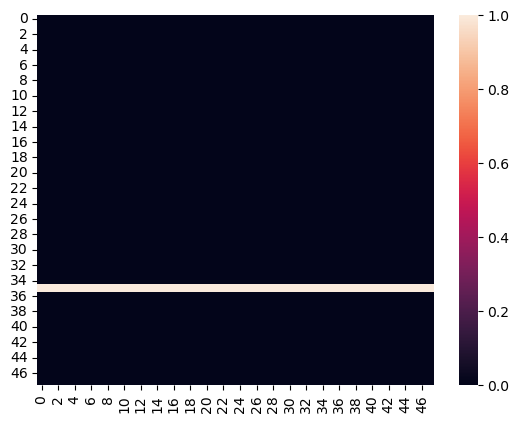

In [67]:
x = torch.zeros(48,48)
x = add_random_line(x)
sns.heatmap(x.detach().numpy())
plt.show()

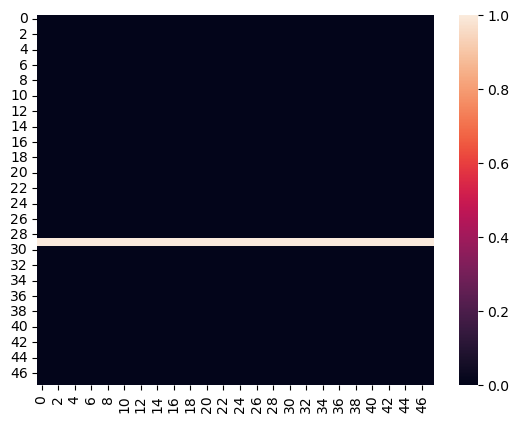

In [36]:
sns.heatmap(x.detach().numpy())
plt.show()

In [70]:
a = torch.tensor(range(10))
a[np.random.choice(10, 4, replace=False)]


tensor([6, 9, 1, 4])

In [72]:
a_ = a.clone()

In [73]:
a_

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [74]:
0.8**1000

1.2302319221611854e-97

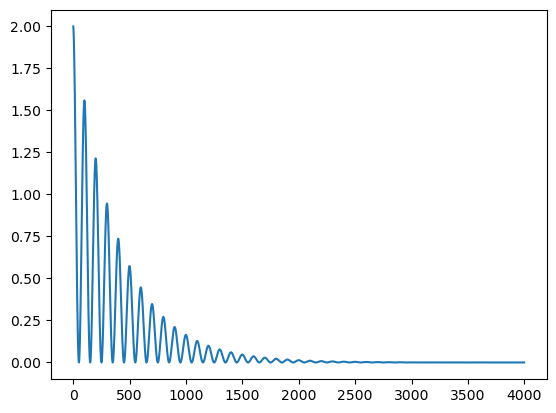

In [4]:
x = np.array(range(0,4000))
y1 = np.exp(-x/400)*(np.cos(np.pi*x/50) + 1)
plt.plot(x, y1)

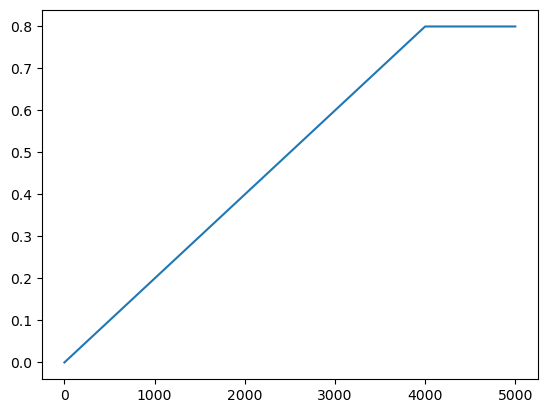

In [40]:

# y = np.array(range(5000))
# for i in range(5000):
#     if y[i] < 4000:
#         y[i] = y[i]*0.7/4000 + 0.1
#     else:
#         y[i] = 0.8

# x = np.array(range(0,5000))
plt.plot([0, 4000, 5000], [0, 0.8, 0.8])

In [30]:
y2

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
y = np.zeros_like(x)
y[x < 4000] = x[x < 4000]*0.7/4000 + 0.1
y

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
x[x<4000].shape

(4000,)

In [34]:
y[x<4000].shape

(4000,)

Text(0, 0.5, 'lr')

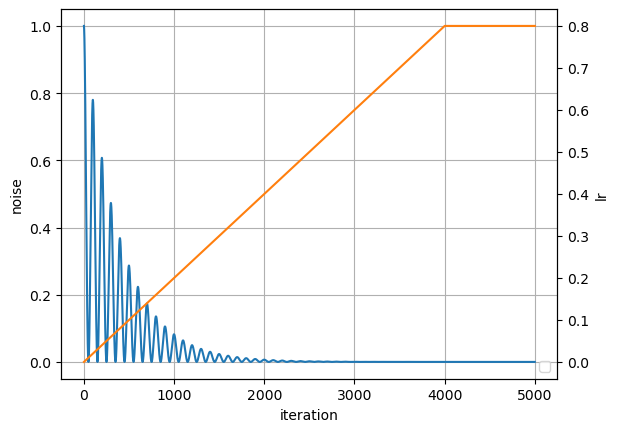

In [45]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
x = np.array(range(0,5000))
y1 = 0.5*np.exp(-x/400)*(np.cos(np.pi*x/50) + 1)
ln1=ax1.plot(x, y1, 'C0')

ax2 = ax1.twinx()
ln2=ax2.plot([0, 4000, 5000], [0, 0.8, 0.8], 'C1')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower right')

ax1.set_xlabel('iteration')
ax1.set_ylabel('noise')
ax1.grid(True)
ax2.set_ylabel('lr')

In [85]:
import sys, os
sys.path.append('..')
DATADIR = "../data/hiragana73"

In [ ]:
from hiragana_dataset import make_hiragana_dataset
from torch.utils.data import Dataset, DataLoader

In [108]:
train_dataset, valid_dataset = make_hiragana_dataset(DATADIR, CATEGORIES=['ga'])
# バッチサイズの指定
batch_size = 1
# DataLoaderを作成
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# 動作確認
# イテレータに変換
batch_iterator = iter(train_dataloader)

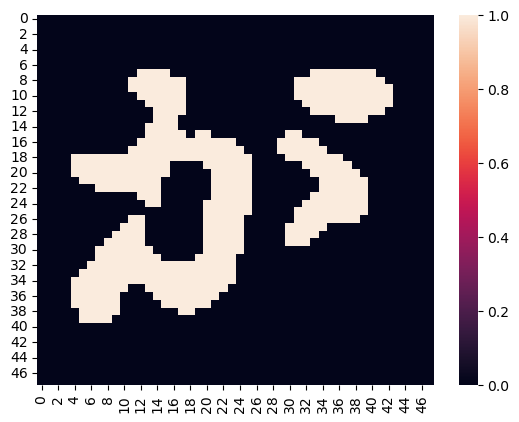

In [109]:
# 1番目の要素を取り出す
inputs, labels = next(batch_iterator)
sns.heatmap(labels.detach().numpy()[0])
plt.show()

In [110]:
tgt = labels[0].detach().tolist()

In [95]:
len(tgt)

48

In [96]:
len(tgt[0])

48

In [111]:
import sys
sys.setrecursionlimit(10**7) #再帰回数の上限変更

def how_many_island(img):
    # マスy,xに隣接する陸を海に置き換え
    def dfs(y,x):
        # 現在地を0に置き換え
        img[y][x] = 0
        # 周囲8マスをループ
        for dx in range(-1,2):
            for dy in range(-1,2):
                # 移動後のマスをny,nxとする
                ny = y + dy
                nx = x + dx

                # ny,nxがfield内で陸かどうかを判別
                if 0 <= nx < w and 0 <= ny < h and img[ny][nx] == 1:
                    dfs(ny,nx)
        return

    w, h = len(img[0]), len(img)

    # 島の数
    ans = 0

    for i in range(h):
        for j in range(w):
            if img[i][j] == 1:
                dfs(i,j)
                ans += 1

    return ans

In [112]:
how_many_island(tgt)

3

In [114]:
def add_noise(x, p):
    flatten = nn.Flatten()
    x_noise = x.clone()
    original_shape = x_noise.shape
    x_noise = flatten(x_noise)
    length = x_noise.shape[-1]
    tgt_num = int(length*p)
    tgt = np.random.choice(length, tgt_num, replace=False)
    x_noise[:, tgt] = 1.0
    x_noise = x_noise.reshape(*original_shape)
    return x_noise

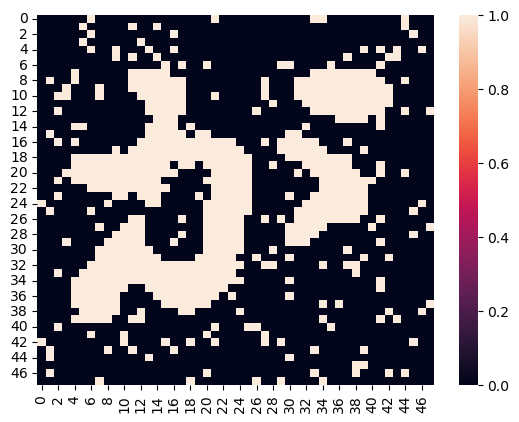

In [125]:
sns.heatmap(add_noise(labels, 0.1).detach().numpy()[0])
plt.show()

In [2]:
nn.Transformer.generate_square_subsequent_mask(7)

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0.]])

In [9]:
a = torch.ones(2,3,4, requires_grad=True)

In [10]:
c = a[..., :1]

In [11]:
id(a) == id(c)

False

In [12]:
b = a.sum()

In [13]:
b.backward()

In [14]:
a.grad

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [15]:
c.grad

/var/folders/fv/jzwx0yvx1k70t0z5f64x63100000gn/T/ipykernel_18337/2950652411.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525473998/work/build/aten/src/ATen/core/TensorBody.h:485.)
  c.grad


In [19]:
a.shape

torch.Size([2, 3, 4])

In [20]:
a.unsqueeze(-1).shape

torch.Size([2, 3, 4, 1])

In [2]:
os.mkdir("../model/model")

In [1]:
import requests

lat = 35.678601  # 緯度
lon = 139.740286 # 経度

url = "http://cyberjapandata2.gsi.go.jp/general/dem/scripts/getelevation.php" \
       "?lon=%s&lat=%s&outtype=%s" %(lon, lat, "JSON")

resp = requests.get(url, timeout=10)
data = resp.json()

print(data["elevation"])

29.2


In [3]:
float(data["elevation"])

29.2

In [21]:
from torch.optim.lr_scheduler import _LRScheduler

class TransformerLR(_LRScheduler):
    """TransformerLR class for adjustment of learning rate.

    The scheduling is based on the method proposed in 'Attention is All You Need'.
    """

    def __init__(self, optimizer, warmup_epochs=4000, last_epoch=-1, verbose=False):
        """Initialize class."""
        self.warmup_epochs = warmup_epochs
        self.normalize = self.warmup_epochs**0.5
        super().__init__(optimizer, last_epoch, verbose)

    def get_lr(self):
        """Return adjusted learning rate."""
        step = self.last_epoch + 1
        scale = self.normalize * min(step**-0.5, step * self.warmup_epochs**-1.5)
        return [base_lr * scale for base_lr in self.base_lrs]

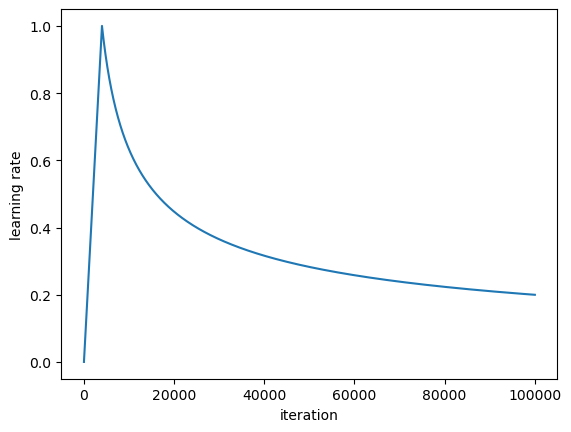

In [22]:
import torch
from torch import nn
import matplotlib.pyplot as plt

model = nn.Sequential(nn.Linear(1, 1), nn.Linear(1, 1))
optimizer = torch.optim.SGD(model.parameters(), lr=1)

scheduler = TransformerLR(optimizer=optimizer, warmup_epochs=8000)

# 学習率表示用
def lr_plot(scheduler):
    lrs = []
    for i in range(100000):
        optimizer.step()
        lrs.append(optimizer.param_groups[0]["lr"])
        scheduler.step()

    plt.plot(lrs)
    plt.xlabel("iteration")
    plt.ylabel("learning rate")
    return lrs

lrs = lr_plot(scheduler=scheduler)

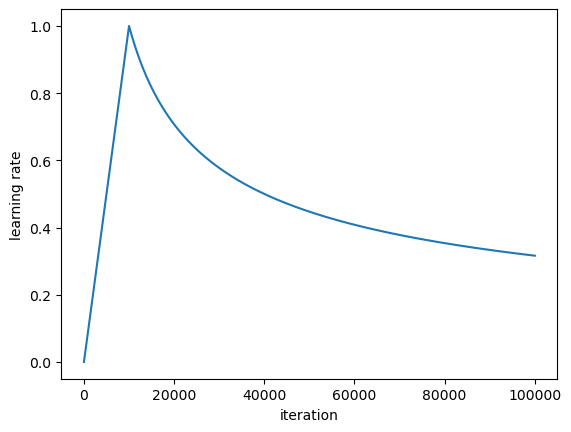

In [25]:
model = nn.Sequential(nn.Linear(1, 1), nn.Linear(1, 1))
optimizer = torch.optim.SGD(model.parameters(), lr=1)
scheduler = TransformerLR(optimizer=optimizer, warmup_epochs=10000)

lrs = lr_plot(scheduler=scheduler)

In [23]:
lrs[613*9]

0.85141078581678

In [10]:
import torch.nn.functional as F

In [19]:
t3d = torch.ones(10, 24, 8)
print(t3d.shape)
p1d = (0, 0, 0, 1) # pad last dim by 1 on each side
out = F.pad(t3d, p1d, "constant", 0)
out.shape

torch.Size([10, 24, 8])


torch.Size([10, 25, 8])

In [20]:
out

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1., 

In [6]:
from torch import nn, Tensor
tgt_mask = nn.Transformer.generate_square_subsequent_mask(5)
tgt_mask

tensor([[0., -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0.]])

In [9]:
import torch
def generate_square_subsequent_mask(dim1: int, dim2: int) -> Tensor:
    """
    Generates an upper-triangular matrix of -inf, with zeros on diag.
    Modified from: 
    https://pytorch.org/tutorials/beginner/transformer_tutorial.html
    Args:
        dim1: int, for both src and tgt masking, this must be target sequence
              length
        dim2: int, for src masking this must be encoder sequence length (i.e. 
              the length of the input sequence to the model), 
              and for tgt masking, this must be target sequence length 
    Return:
        A Tensor of shape [dim1, dim2]
    """
    return torch.triu(torch.ones(dim1, dim2) * float('-inf'), diagonal=1)

In [14]:
generate_square_subsequent_mask(1, 25)

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
         -inf]])

In [12]:
torch.ones(3,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [15]:
decoder_input_layer = nn.Linear(
    in_features=1, # the number of features you want to predict. Usually just 1 
    out_features=64
)

In [19]:
out = decoder_input_layer(torch.ones(512, 1, 1))
out.shape

torch.Size([512, 1, 64])

In [18]:
torch.__version__

'1.13.1'

In [ ]:
decoder_input_layer = nn.Linear(in_features=1,out_features=64)

In [4]:
dim_model = 9
torch.arange(0, dim_model, 2)

tensor([0, 2, 4, 6, 8])

In [16]:
import math

In [17]:
class PositionalEncoding1(nn.Module):
    """
    モデルに入力するデータの時系列的順番に関する情報を埋め込むためのクラス
    """
    def __init__(self, dim_model, dropout_p, max_len):
        super().__init__()
        self.dropout = nn.Dropout(dropout_p)
        pos_encoding = torch.zeros(max_len, dim_model)
        positions_list = torch.arange(0, max_len, dtype=torch.float).view(-1, 1) # 0, 1, 2, 3, 4, 5
        division_term = torch.exp(torch.arange(0, dim_model, 2).float() * (-math.log(10000.0)) / dim_model) # 1000^(2i/dim_model)
        pos_encoding[:, 0::2] = torch.sin(positions_list * division_term)
        pos_encoding[:, 1::2] = torch.cos(positions_list * division_term)
        pos_encoding = pos_encoding.unsqueeze(0).transpose(0, 1)
        self.register_buffer("pos_encoding",pos_encoding)
        
    def forward(self, token_embedding: torch.tensor) -> torch.tensor:
        return self.dropout(token_embedding + self.pos_encoding[:token_embedding.size(0), :])

    # def forward(self, token_embedding: torch.tensor) -> torch.tensor:
    #     token_embedding = torch.transpose(token_embedding, 0, 1)
    #     return torch.transpose(self.dropout(token_embedding + self.pos_encoding[:token_embedding.size(0), :]), 0, 1)

In [9]:
class PositionalEncoding2(nn.Module):
    """
    モデルに入力するデータの時系列的順番に関する情報を埋め込むためのクラス
    """
    def __init__(self, dim_model, dropout_p, max_len):
        super().__init__()
        self.dropout = nn.Dropout(dropout_p)
        pos_encoding = torch.zeros(max_len, dim_model)
        positions_list = torch.arange(0, max_len, dtype=torch.float).view(-1, 1) # 0, 1, 2, 3, 4, 5
        division_term = torch.exp(torch.arange(0, dim_model, 2).float() * (-math.log(10000.0)) / dim_model) # 1000^(2i/dim_model)
        pos_encoding[:, 0::2] = torch.sin(positions_list * division_term)
        pos_encoding[:, 1::2] = torch.cos(positions_list * division_term)
        pos_encoding = pos_encoding.unsqueeze(0).transpose(0, 1)
        self.register_buffer("pos_encoding",pos_encoding)

    def forward(self, token_embedding: torch.tensor) -> torch.tensor:
        token_embedding = torch.transpose(token_embedding, 0, 1)
        return torch.transpose(self.dropout(token_embedding + self.pos_encoding[:token_embedding.size(0), :]), 0, 1)

In [10]:
pe1 = PositionalEncoding1(4, 0, 10)
pe2 = PositionalEncoding2(4, 0, 10)

In [11]:
x = torch.ones(6,5,4)

In [13]:
pe1(x)

tensor([[[1.0000, 2.0000, 1.0000, 2.0000],
         [1.0000, 2.0000, 1.0000, 2.0000],
         [1.0000, 2.0000, 1.0000, 2.0000],
         [1.0000, 2.0000, 1.0000, 2.0000],
         [1.0000, 2.0000, 1.0000, 2.0000]],

        [[1.8415, 1.5403, 1.0100, 1.9999],
         [1.8415, 1.5403, 1.0100, 1.9999],
         [1.8415, 1.5403, 1.0100, 1.9999],
         [1.8415, 1.5403, 1.0100, 1.9999],
         [1.8415, 1.5403, 1.0100, 1.9999]],

        [[1.9093, 0.5839, 1.0200, 1.9998],
         [1.9093, 0.5839, 1.0200, 1.9998],
         [1.9093, 0.5839, 1.0200, 1.9998],
         [1.9093, 0.5839, 1.0200, 1.9998],
         [1.9093, 0.5839, 1.0200, 1.9998]],

        [[1.1411, 0.0100, 1.0300, 1.9996],
         [1.1411, 0.0100, 1.0300, 1.9996],
         [1.1411, 0.0100, 1.0300, 1.9996],
         [1.1411, 0.0100, 1.0300, 1.9996],
         [1.1411, 0.0100, 1.0300, 1.9996]],

        [[0.2432, 0.3464, 1.0400, 1.9992],
         [0.2432, 0.3464, 1.0400, 1.9992],
         [0.2432, 0.3464, 1.0400, 1.9992],
   

In [14]:
pe2(x)

tensor([[[1.0000, 2.0000, 1.0000, 2.0000],
         [1.8415, 1.5403, 1.0100, 1.9999],
         [1.9093, 0.5839, 1.0200, 1.9998],
         [1.1411, 0.0100, 1.0300, 1.9996],
         [0.2432, 0.3464, 1.0400, 1.9992]],

        [[1.0000, 2.0000, 1.0000, 2.0000],
         [1.8415, 1.5403, 1.0100, 1.9999],
         [1.9093, 0.5839, 1.0200, 1.9998],
         [1.1411, 0.0100, 1.0300, 1.9996],
         [0.2432, 0.3464, 1.0400, 1.9992]],

        [[1.0000, 2.0000, 1.0000, 2.0000],
         [1.8415, 1.5403, 1.0100, 1.9999],
         [1.9093, 0.5839, 1.0200, 1.9998],
         [1.1411, 0.0100, 1.0300, 1.9996],
         [0.2432, 0.3464, 1.0400, 1.9992]],

        [[1.0000, 2.0000, 1.0000, 2.0000],
         [1.8415, 1.5403, 1.0100, 1.9999],
         [1.9093, 0.5839, 1.0200, 1.9998],
         [1.1411, 0.0100, 1.0300, 1.9996],
         [0.2432, 0.3464, 1.0400, 1.9992]],

        [[1.0000, 2.0000, 1.0000, 2.0000],
         [1.8415, 1.5403, 1.0100, 1.9999],
         [1.9093, 0.5839, 1.0200, 1.9998],
   

In [24]:
pe2 = PositionalEncoding2(64, 0, 50)
x = torch.zeros(1,24,64)
pe2(x)

tensor([[[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
           0.0000e+00,  1.0000e+00],
         [ 8.4147e-01,  5.4030e-01,  6.8156e-01,  ...,  1.0000e+00,
           1.3335e-04,  1.0000e+00],
         [ 9.0930e-01, -4.1615e-01,  9.9748e-01,  ...,  1.0000e+00,
           2.6670e-04,  1.0000e+00],
         ...,
         [ 8.3666e-01, -5.4773e-01, -3.9804e-02,  ...,  9.9999e-01,
           2.8004e-03,  1.0000e+00],
         [-8.8513e-03, -9.9996e-01, -7.1015e-01,  ...,  9.9999e-01,
           2.9337e-03,  1.0000e+00],
         [-8.4622e-01, -5.3283e-01, -9.9951e-01,  ...,  9.9999e-01,
           3.0671e-03,  1.0000e+00]]])

In [25]:
x = torch.ones(1,24,64)
pe2(x)

tensor([[[1.0000e+00, 2.0000e+00, 1.0000e+00,  ..., 2.0000e+00,
          1.0000e+00, 2.0000e+00],
         [1.8415e+00, 1.5403e+00, 1.6816e+00,  ..., 2.0000e+00,
          1.0001e+00, 2.0000e+00],
         [1.9093e+00, 5.8385e-01, 1.9975e+00,  ..., 2.0000e+00,
          1.0003e+00, 2.0000e+00],
         ...,
         [1.8367e+00, 4.5227e-01, 9.6020e-01,  ..., 2.0000e+00,
          1.0028e+00, 2.0000e+00],
         [9.9115e-01, 3.9160e-05, 2.8985e-01,  ..., 2.0000e+00,
          1.0029e+00, 2.0000e+00],
         [1.5378e-01, 4.6717e-01, 4.8649e-04,  ..., 2.0000e+00,
          1.0031e+00, 2.0000e+00]]])

In [28]:
x = torch.tensor([-20, -10, 0, 10, 20])
torch.sigmoid(x)

tensor([2.0612e-09, 4.5398e-05, 5.0000e-01, 9.9995e-01, 1.0000e+00])